In [2]:
import pandas as pd
import numpy as np
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df=pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08
make = df.make
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df.SNOW.rename(dates))
snow

/tmp/ipykernel_33669/966294185.py:4: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(url)


1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

# Plotting with a Series
For Jupyer cell magic: `%matplotlib inline%`


In [3]:
%matplotlib inline

The following plot attributes for a series : `bar, barh, box, hist, kde, line & pie`

### 14.3 Histograms
- for continuous numeric data, histogram gives insight how data is distributed:

<Axes: ylabel='Frequency'>

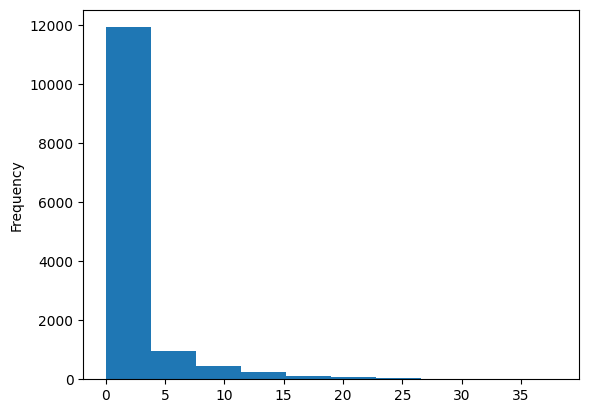

In [4]:
snow.plot.hist()

The snow data is heavily skewed, we might want to drop the zero entries and try again:

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

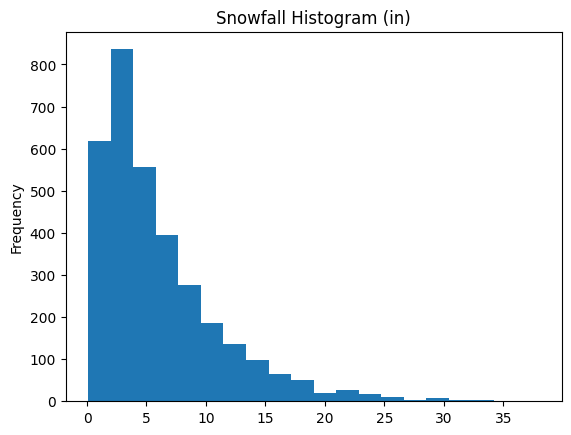

In [5]:
snow[snow>0].plot.hist(bins= 20, title='Snowfall Histogram (in)')